In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
plt.style.use('ggplot')

In [28]:
path = r'/Users/bassel_instructor/Documents/Datasets/'

df = pd.read_csv(path+'Drug_Sales.csv', parse_dates=['Date'])

df.head()

,Date,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,2019-09-01,2.00,4.360,5.00,17.000,8.2,1.0,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
1,2019-09-02,5.33,2.087,2.50,18.000,7.0,0.0,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2,2019-09-03,9.36,2.350,3.10,12.125,8.0,3.0,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2.00,0.373,2.15,29.230,7.0,0.0,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,7.00,9.530,2.00,14.000,1.0,0.0,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


In [29]:
df.shape

(30, 17)

**About The Data**
- **Date**: Date of the sales
- **Drug1, Drug2, ... Drug8**: Sale quantity
- **Drug1_Sales, Drug2_Sales, ..., Drug8_Sales**: Sale amount in dollars

In [30]:
df.dtypes

Date           datetime64[ns]
Drug1                 float64
Drug2                 float64
Drug3                 float64
Drug4                 float64
Drug5                 float64
Drug6                 float64
Drug7                 float64
Drug8                 float64
Drug1_Sales           float64
Drug2_Sales           float64
Drug3_Sales           float64
Drug4_Sales           float64
Drug5_Sales           float64
Drug6_Sales           float64
Drug7_Sales           float64
Drug8_Sales           float64
dtype: object

> If you don't use `parse_dates=['Date']` you can also convert the date colume using `to_datetime(df['Date'])`

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

> Be careful with the date format. Some values may have different formats. Therefore, you need to specify the format.

## Feature Extraction
Extract information from the date

You can use date components: `year, month, day, hour, minute, second`

In [32]:
df.insert(1,'Year',df['Date'].dt.year)
df.insert(2,'Month',df['Date'].dt.month)
df.insert(3,'Day',df['Date'].dt.day)
df.head()

,Date,Year,Month,Day,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,2019-09-01,2019,9,1,2.00,4.360,5.00,17.000,8.2,1.0,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
1,2019-09-02,2019,9,2,5.33,2.087,2.50,18.000,7.0,0.0,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2,2019-09-03,2019,9,3,9.36,2.350,3.10,12.125,8.0,3.0,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2019,9,4,2.00,0.373,2.15,29.230,7.0,0.0,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,2019,9,5,7.00,9.530,2.00,14.000,1.0,0.0,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


In [33]:
#df['Drug1'].groupby(df['Day'].dt.to_period('W')).sum()

### Using `strftime()`
Documentation https://strftime.org/

Let's use the function to extract the name of the day from the dates. (what if the name of the day is a significant feature for the ML prediction)

In [34]:
df.insert(4,'DayName',df['Date'].dt.strftime('%a'))
df.head()

,Date,Year,Month,Day,DayName,Drug1,Drug2,Drug3,Drug4,Drug5,...,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,2019-09-01,2019,9,1,Sun,2.00,4.360,5.00,17.000,8.2,...,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
1,2019-09-02,2019,9,2,Mon,5.33,2.087,2.50,18.000,7.0,...,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2,2019-09-03,2019,9,3,Tue,9.36,2.350,3.10,12.125,8.0,...,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2019,9,4,Wed,2.00,0.373,2.15,29.230,7.0,...,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,2019,9,5,Thu,7.00,9.530,2.00,14.000,1.0,...,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


Dates can be used in a filter in Pandas

In [35]:
# get data between Sep 3 and Sep 6
mask = (df['Date']>= '2019-09-03') & (df['Date']<= '2019-09-06')

df_filtered = df[mask]
df_filtered.head()

,Date,Year,Month,Day,DayName,Drug1,Drug2,Drug3,Drug4,Drug5,...,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
2,2019-09-03,2019,9,3,Tue,9.36,2.350,3.10,12.125,8.0,...,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2019,9,4,Wed,2.00,0.373,2.15,29.230,7.0,...,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,2019,9,5,Thu,7.00,9.530,2.00,14.000,1.0,...,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0
5,2019-09-06,2019,9,6,Fri,1.68,2.670,1.00,28.400,7.0,...,0.0,1.5,1680.0,2136.0,1500.0,17040.0,3850.0,0.0,0.0,1350.0


## Aggregating By Date

<Axes: ylabel='DayName'>

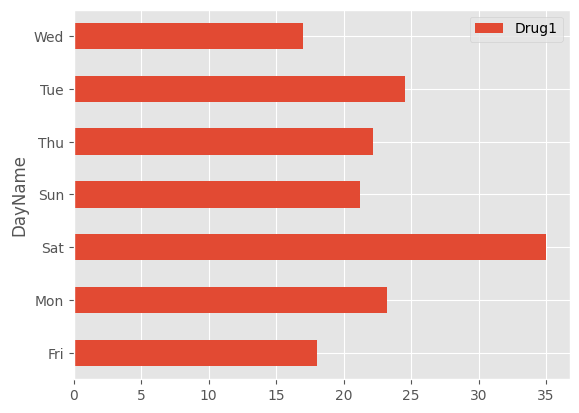

In [36]:
df[['Drug1','DayName']].groupby('DayName').sum().plot(kind='barh')

### Aggregation Using `resample()` 

> In order to use `resample()` you need to convert the date column into an index.

In [37]:
df.set_index('Date', drop=True, inplace=True) #drop=True removes the extra copy date column
df.head()

,Year,Month,Day,DayName,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,,,,,
2019-09-01,2019,9,1,Sun,2.00,4.360,5.00,17.000,8.2,1.0,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
2019-09-02,2019,9,2,Mon,5.33,2.087,2.50,18.000,7.0,0.0,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2019-09-03,2019,9,3,Tue,9.36,2.350,3.10,12.125,8.0,3.0,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
2019-09-04,2019,9,4,Wed,2.00,0.373,2.15,29.230,7.0,0.0,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
2019-09-05,2019,9,5,Thu,7.00,9.530,2.00,14.000,1.0,0.0,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


In [38]:
df.index

DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12',
               '2019-09-13', '2019-09-14', '2019-09-15', '2019-09-16',
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24',
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

You can resample by date part or date range. Examples:
- 3 days
- 30 minutes
- Week
- Month

In [39]:
# for our data, we can aggregate by week
# get the total weekly sales
# drop the date part columns
weekly_sum = df.resample('W').sum().drop(columns=['Year', 'Month', 'Day', 'DayName'])
weekly_sum.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2019-09-01,2.00,4.360,5.00,17.000,8.2,1.0,5.000000,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
2019-09-08,40.71,26.767,15.75,154.755,51.0,6.0,15.000000,28.5,40710.0,21413.6,23625.0,92853.0,28050.0,60000.0,6750.0,25650.0
2019-09-15,35.51,30.977,19.65,178.375,67.2,5.0,30.000000,30.5,35510.0,24781.6,29475.0,107025.0,36960.0,50000.0,13500.0,27450.0
2019-09-22,46.84,25.396,24.40,248.250,31.2,3.0,26.000000,21.0,46840.0,20316.8,36600.0,148950.0,17160.0,30000.0,11700.0,18900.0
2019-09-29,34.01,22.498,26.60,336.700,61.2,1.0,40.416667,23.1,34010.0,17998.4,39900.0,202020.0,33660.0,10000.0,18187.5,20790.0


- data is aggregated by default as left (lookback) 
- e.g For Sep 1 it looks back 7 days into Aug, but it doesn't have any data points. So, we get Drug1 = 2
- To change this, you can use `lable='right'` 

<Axes: xlabel='Date'>

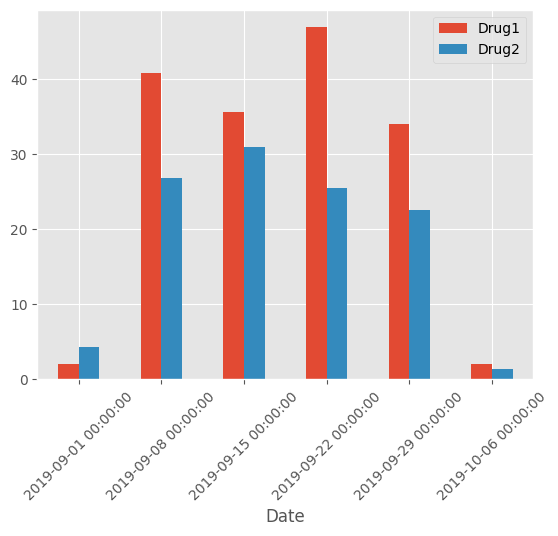

In [49]:
weekly_sum[['Drug1','Drug2']].plot(kind='bar', rot=45)

- With the steps above, we're able to compare the num of sales between Drug1 and Drug2
- We can clearly see that Drug1 sold more, except for the the first week/day

''

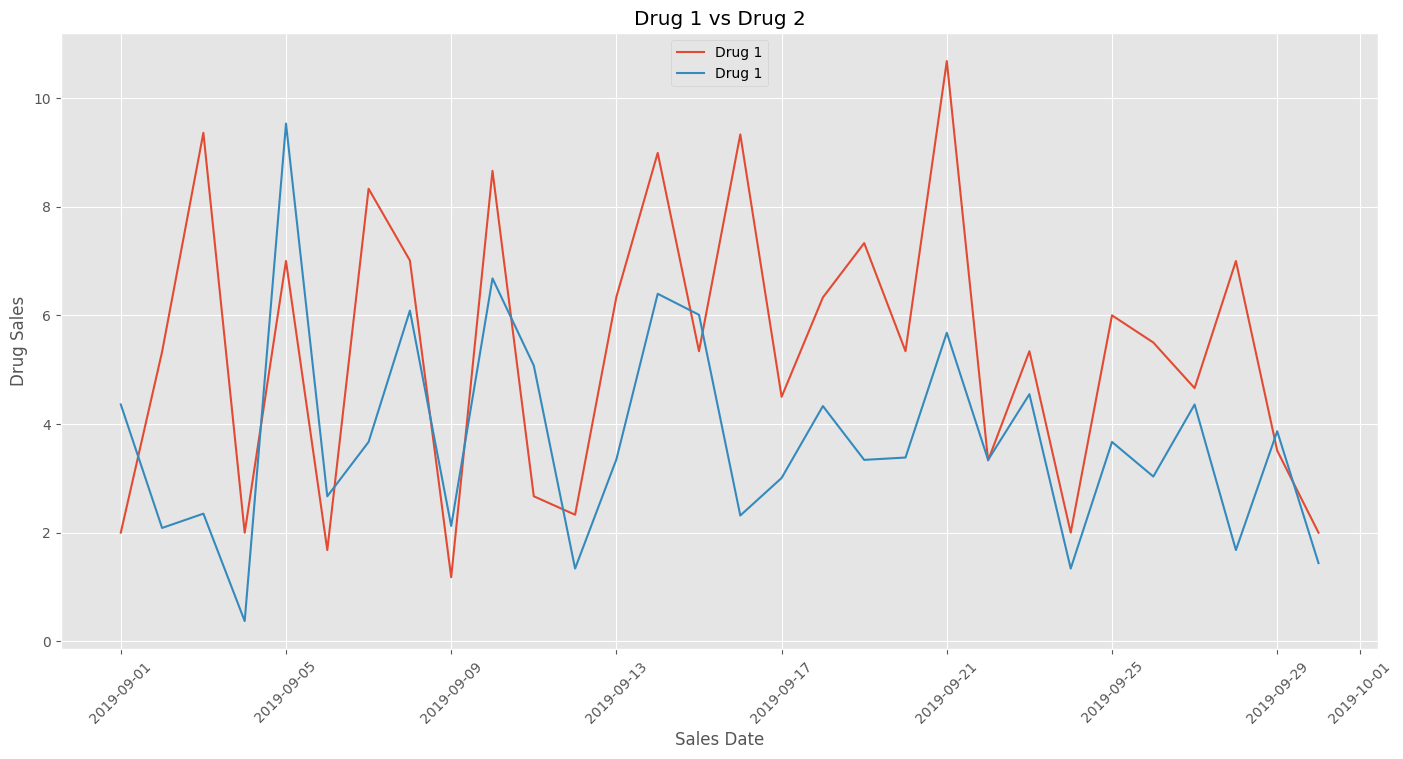

In [41]:
plt.figure(figsize=(17,8))
sns.lineplot(data=df, x='Date', y='Drug1', label='Drug 1')
sns.lineplot(data=df, x='Date', y='Drug2', label='Drug 1')

plt.xlabel('Sales Date')
plt.ylabel('Drug Sales')
plt.title('Drug 1 vs Drug 2')
plt.legend(loc='upper center')
plt.xticks(rotation=45)
;

## Generating Date Series

Generate a series/dataframe with date range from Jan 1 to End of May (2024) with daily frequency (1 day for each row)

In [42]:
indx_dt = pd.date_range(start='2024-01-01', end='2024-05-31', freq='D')
indx_dt

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-05-22', '2024-05-23', '2024-05-24', '2024-05-25',
               '2024-05-26', '2024-05-27', '2024-05-28', '2024-05-29',
               '2024-05-30', '2024-05-31'],
              dtype='datetime64[ns]', length=152, freq='D')

In [43]:
len(indx_dt)

152

In [44]:
data= {
    'Date': pd.date_range(start='2024-01-01', end='2024-05-31', freq='D'),
    'Value': np.random.randint(0,100,152) #generate 152 random values from 0 to 100
}

df_dt = pd.DataFrame(data)
df_dt.head(20)

,Date,Value
0,2024-01-01,37
1,2024-01-02,76
2,2024-01-03,94
3,2024-01-04,64
4,2024-01-05,58
5,2024-01-06,85
6,2024-01-07,66
7,2024-01-08,68
8,2024-01-09,75
9,2024-01-10,20


In [45]:
df_dt['DateFormat2'] = df_dt['Date'].dt.strftime('%d/%m/%y')
df_dt.head()

,Date,Value,DateFormat2
0,2024-01-01,37,01/01/24
1,2024-01-02,76,02/01/24
2,2024-01-03,94,03/01/24
3,2024-01-04,64,04/01/24
4,2024-01-05,58,05/01/24


### Using `Timedelta`

In [46]:
# add 5 days to current date
df_dt['DatePlus5'] = df_dt['Date'] + pd.Timedelta(days=5)
df_dt.head()

,Date,Value,DateFormat2,DatePlus5
0,2024-01-01,37,01/01/24,2024-01-06
1,2024-01-02,76,02/01/24,2024-01-07
2,2024-01-03,94,03/01/24,2024-01-08
3,2024-01-04,64,04/01/24,2024-01-09
4,2024-01-05,58,05/01/24,2024-01-10


In [47]:
df_dt['Date'] + pd.Timedelta(days=5, weeks=2, hours=32)

0     2024-01-21 08:00:00
1     2024-01-22 08:00:00
2     2024-01-23 08:00:00
3     2024-01-24 08:00:00
4     2024-01-25 08:00:00
              ...        
147   2024-06-16 08:00:00
148   2024-06-17 08:00:00
149   2024-06-18 08:00:00
150   2024-06-19 08:00:00
151   2024-06-20 08:00:00
Name: Date, Length: 152, dtype: datetime64[ns]

> When you don't have a time component, it'll add hours to midnight.

In [48]:
# subtraction
df_dt['Date'] - pd.Timedelta(days=5, weeks=2, hours=32)

0     2023-12-11 16:00:00
1     2023-12-12 16:00:00
2     2023-12-13 16:00:00
3     2023-12-14 16:00:00
4     2023-12-15 16:00:00
              ...        
147   2024-05-06 16:00:00
148   2024-05-07 16:00:00
149   2024-05-08 16:00:00
150   2024-05-09 16:00:00
151   2024-05-10 16:00:00
Name: Date, Length: 152, dtype: datetime64[ns]